# Building an EDA Dashboard with Matplotlib

This notebook demonstrates how to create similar visualizations using Matplotlib instead of HvPlot. While we lose interactivity, Matplotlib offers great control over plot aesthetics and is the foundation of Python data visualization.

## Prerequisites

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.sampledata.autompg import autompg_clean as df

# Set style for better-looking plots
#plt.style.use('seaborn')
# Increase figure size for better visibility
plt.rcParams['figure.figsize'] = [10, 6]
# Better resolution
plt.rcParams['figure.dpi'] = 100

## Data Preparation

First, let's prepare our data and identify numeric and categorical columns:

In [3]:
# Identify numeric and categorical columns
numeric_cols = list(df.select_dtypes(include=[np.number]).columns)
categorical_cols = list(df.select_dtypes(exclude=[np.number]).columns)

print("First few rows of our data:")
display(df.head())
print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

First few rows of our data:


,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford



Numeric columns: ['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr']
Categorical columns: ['origin', 'name', 'mfr']


## 1. Distribution Analysis

Let's create histograms for our key numeric variables:

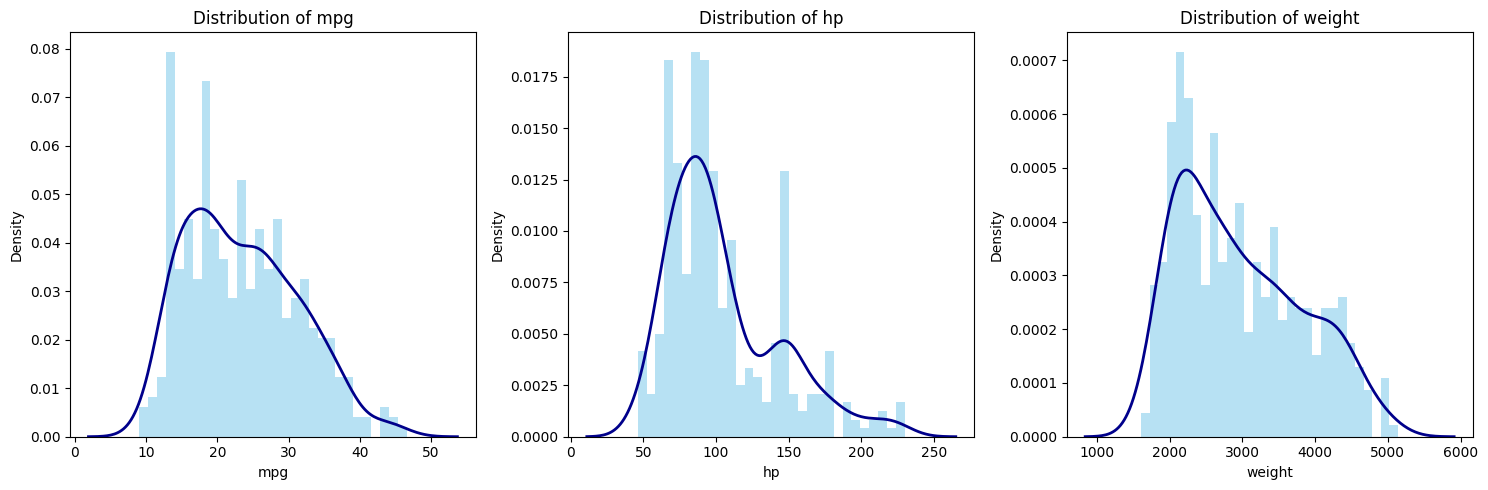

In [4]:
def plot_distributions(df, vars_to_plot=['mpg', 'hp', 'weight']):
    """Create histograms with KDE for multiple variables"""
    fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(15, 5))

    for ax, var in zip(axes, vars_to_plot):
        # Histogram
        ax.hist(df[var], bins=30, alpha=0.6, density=True, color='skyblue')

        # Add KDE
        sns.kdeplot(data=df[var], ax=ax, color='darkblue', linewidth=2)

        # Customize plot
        ax.set_title(f'Distribution of {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Density')

    plt.tight_layout()
    return fig

# Create the distribution plots
dist_fig = plot_distributions(df)
plt.show()

## 2. Box Plots by Origin

Let's examine the distribution of key metrics across different origins:

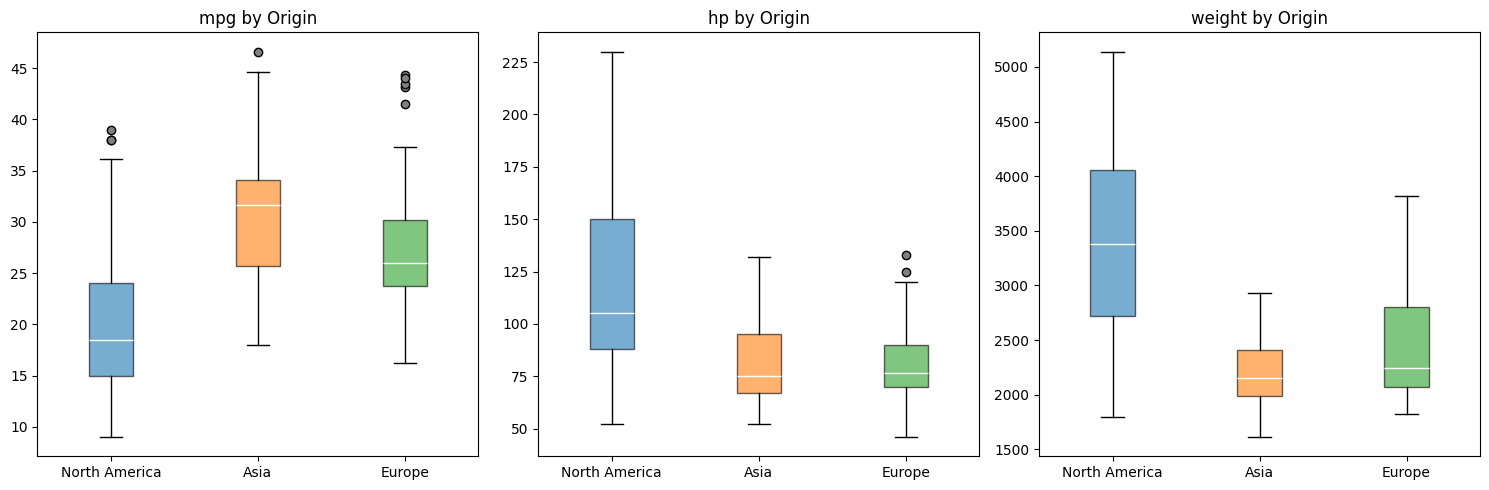

In [5]:
def plot_boxplots(df, vars_to_plot=['mpg', 'hp', 'weight']):
    """Create box plots for multiple variables grouped by origin"""
    fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(15, 5))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    for ax, var in zip(axes, vars_to_plot):
        # Create box plot
        bp = ax.boxplot([df[df['origin']==origin][var] for origin in df['origin'].unique()],
                        patch_artist=True,
                        medianprops=dict(color="white"),
                        flierprops=dict(marker='o', markerfacecolor='gray'))

        # Color boxes
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)

        # Customize plot
        ax.set_title(f'{var} by Origin')
        ax.set_xticklabels(df['origin'].unique())

    plt.tight_layout()
    return fig

# Create the box plots
box_fig = plot_boxplots(df)
plt.show()

## 3. Scatter Plot Matrix

Let's create a scatter plot matrix to see relationships between variables:

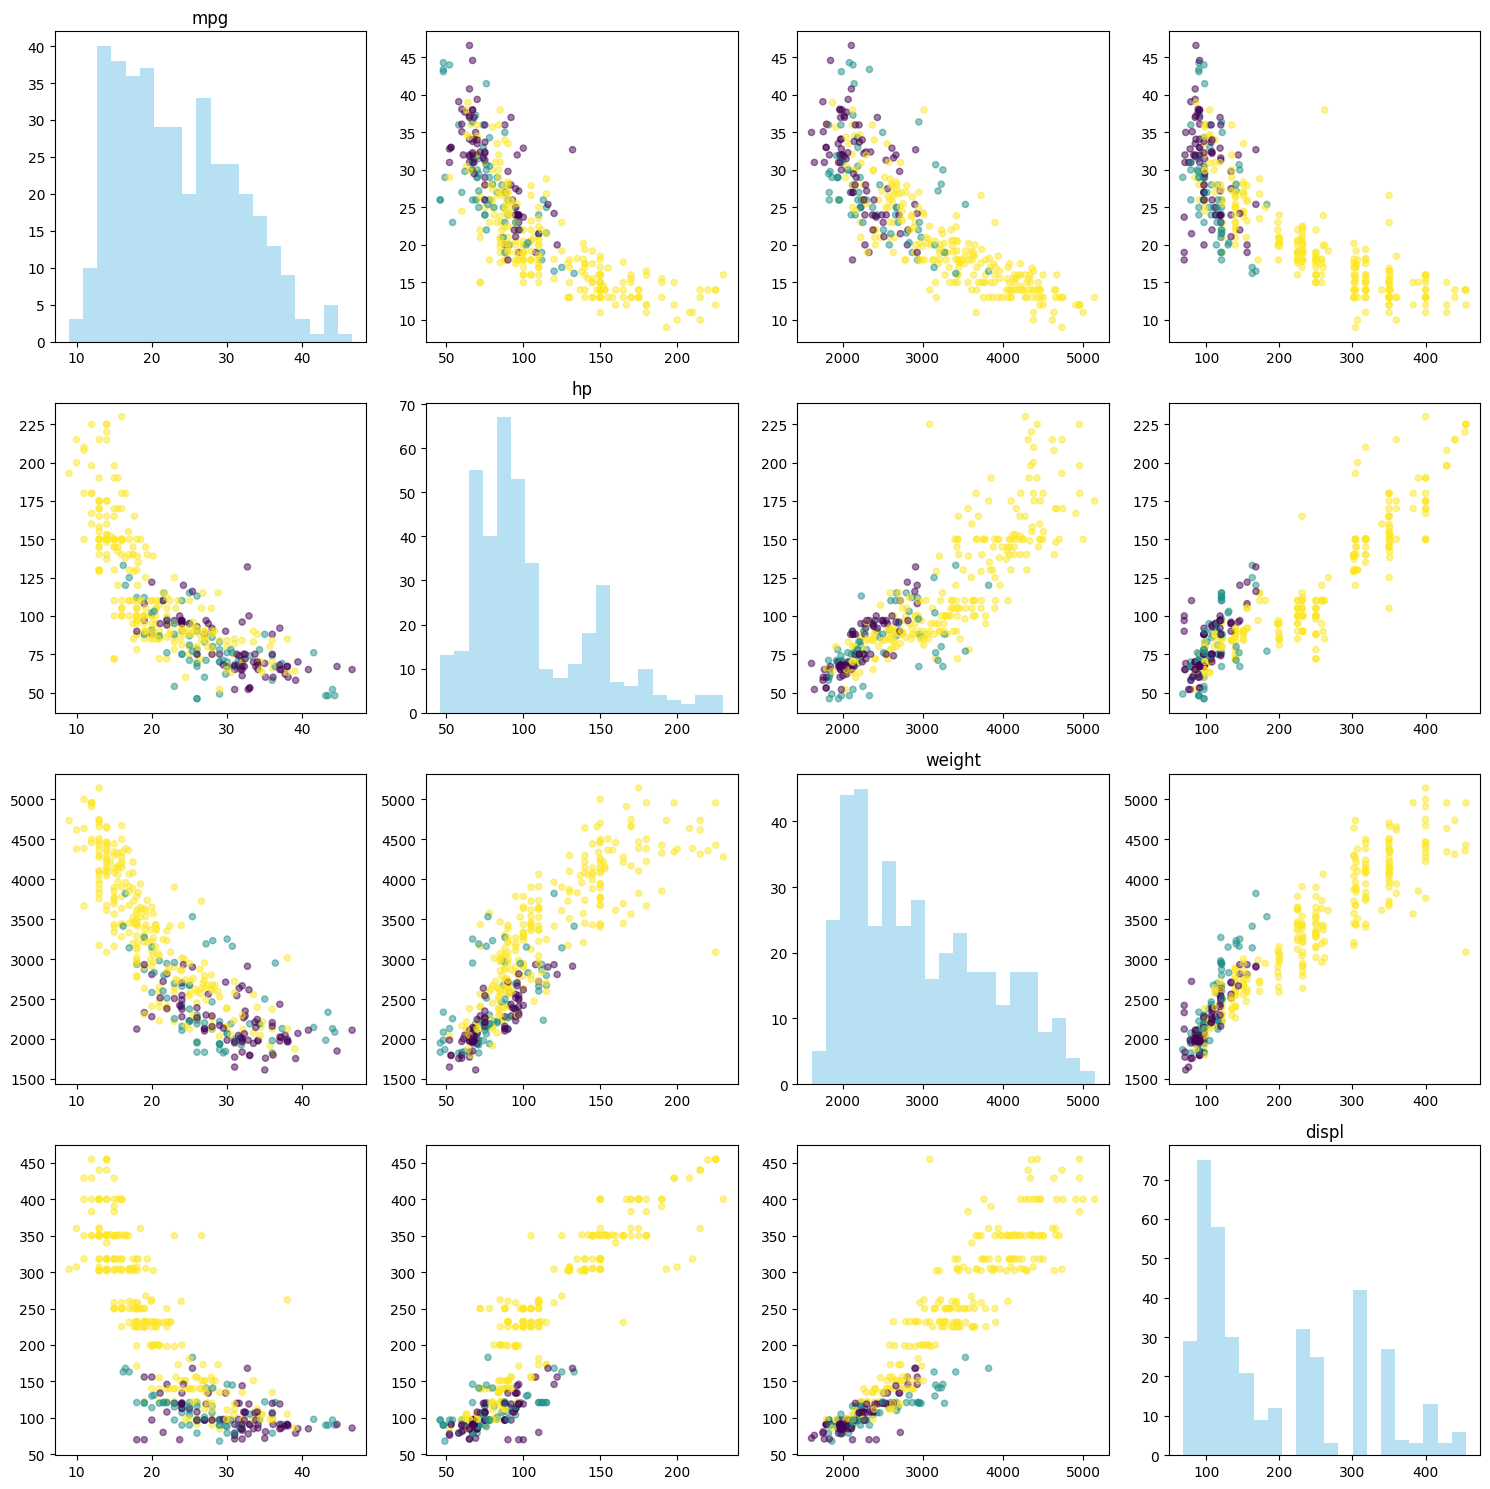

In [6]:
def plot_scatter_matrix(df, vars_to_plot=['mpg', 'hp', 'weight', 'displ']):
    """Create a scatter plot matrix with histograms on diagonal"""
    # Set up the figure
    n_vars = len(vars_to_plot)
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))

    # Plot each variable against others
    for i, var1 in enumerate(vars_to_plot):
        for j, var2 in enumerate(vars_to_plot):
            ax = axes[i, j]

            if i == j:  # Diagonal - plot histogram
                ax.hist(df[var1], bins=20, color='skyblue', alpha=0.6)
                ax.set_title(var1)
            else:  # Off-diagonal - plot scatter
                ax.scatter(df[var2], df[var1],
                          c=pd.Categorical(df['origin']).codes,
                          cmap='viridis',
                          alpha=0.5,
                          s=20)

    plt.tight_layout()
    return fig

# Create the scatter matrix
scatter_fig = plot_scatter_matrix(df)
plt.show()

## 4. Correlation Heatmap

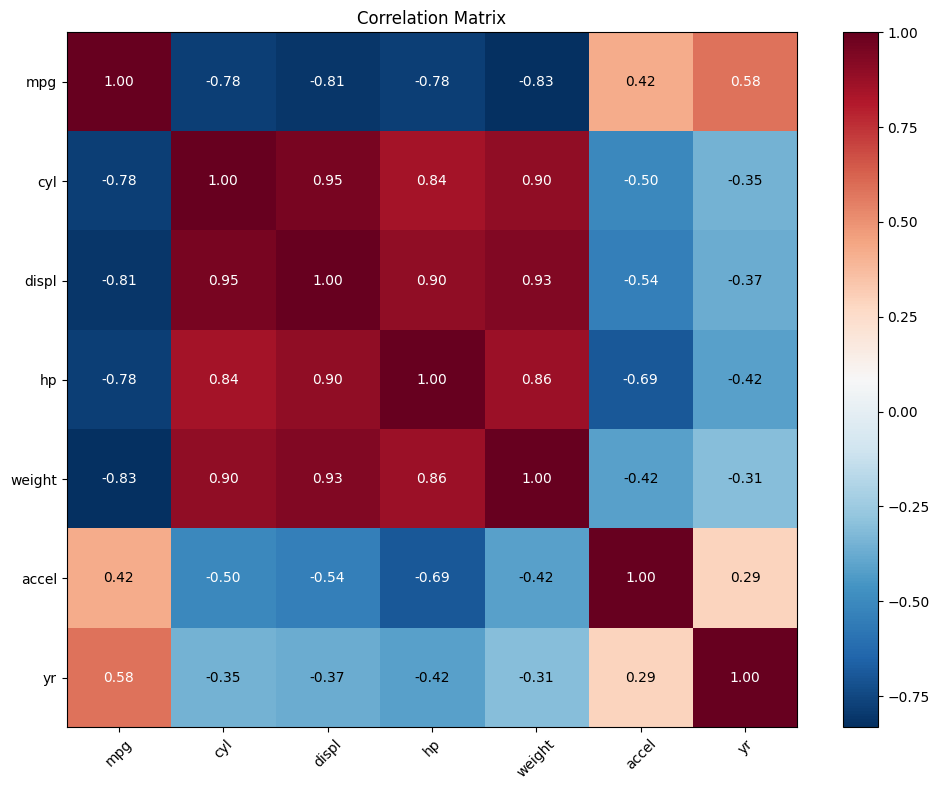

In [7]:
def plot_correlation_heatmap(df, vars_to_plot=numeric_cols):
    """Create a correlation heatmap with annotations"""
    # Calculate correlation matrix
    corr_matrix = df[vars_to_plot].corr()

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create heatmap
    im = ax.imshow(corr_matrix, cmap='RdBu_r', aspect='auto')

    # Add colorbar
    plt.colorbar(im)

    # Add correlation values
    for i in range(len(vars_to_plot)):
        for j in range(len(vars_to_plot)):
            text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center',
                          color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

    # Customize plot
    ax.set_xticks(range(len(vars_to_plot)))
    ax.set_yticks(range(len(vars_to_plot)))
    ax.set_xticklabels(vars_to_plot, rotation=45)
    ax.set_yticklabels(vars_to_plot)
    plt.title('Correlation Matrix')

    plt.tight_layout()
    return fig

# Create the heatmap
heatmap_fig = plot_correlation_heatmap(df)
plt.show()

## 5. Summary Statistics Table

In [8]:
def create_summary_stats(df, group_by='origin'):
    """Create summary statistics grouped by a categorical variable"""
    # Calculate summary statistics
    summary = df.groupby(group_by).agg({
        'mpg': ['mean', 'std', 'min', 'max', 'count'],
        'hp': ['mean', 'std', 'min', 'max'],
        'weight': ['mean', 'std', 'min', 'max']
    }).round(2)

    display(summary)

# Display summary statistics
create_summary_stats(df)

mpg                              hp                   weight  \
                mean   std   min   max count    mean    std min  max     mean   
origin                                                                          
Asia           30.45  6.09  18.0  46.6    79   79.84  17.82  52  132  2221.23   
Europe         27.60  6.58  16.2  44.3    68   80.56  20.16  46  133  2433.47   
North America  20.03  6.44   9.0  39.0   245  119.05  39.90  52  230  3372.49   

                                   
                  std   min   max  
origin                             
Asia           320.50  1613  2930  
Europe         491.81  1825  3820  
North America  795.35  1800  5140

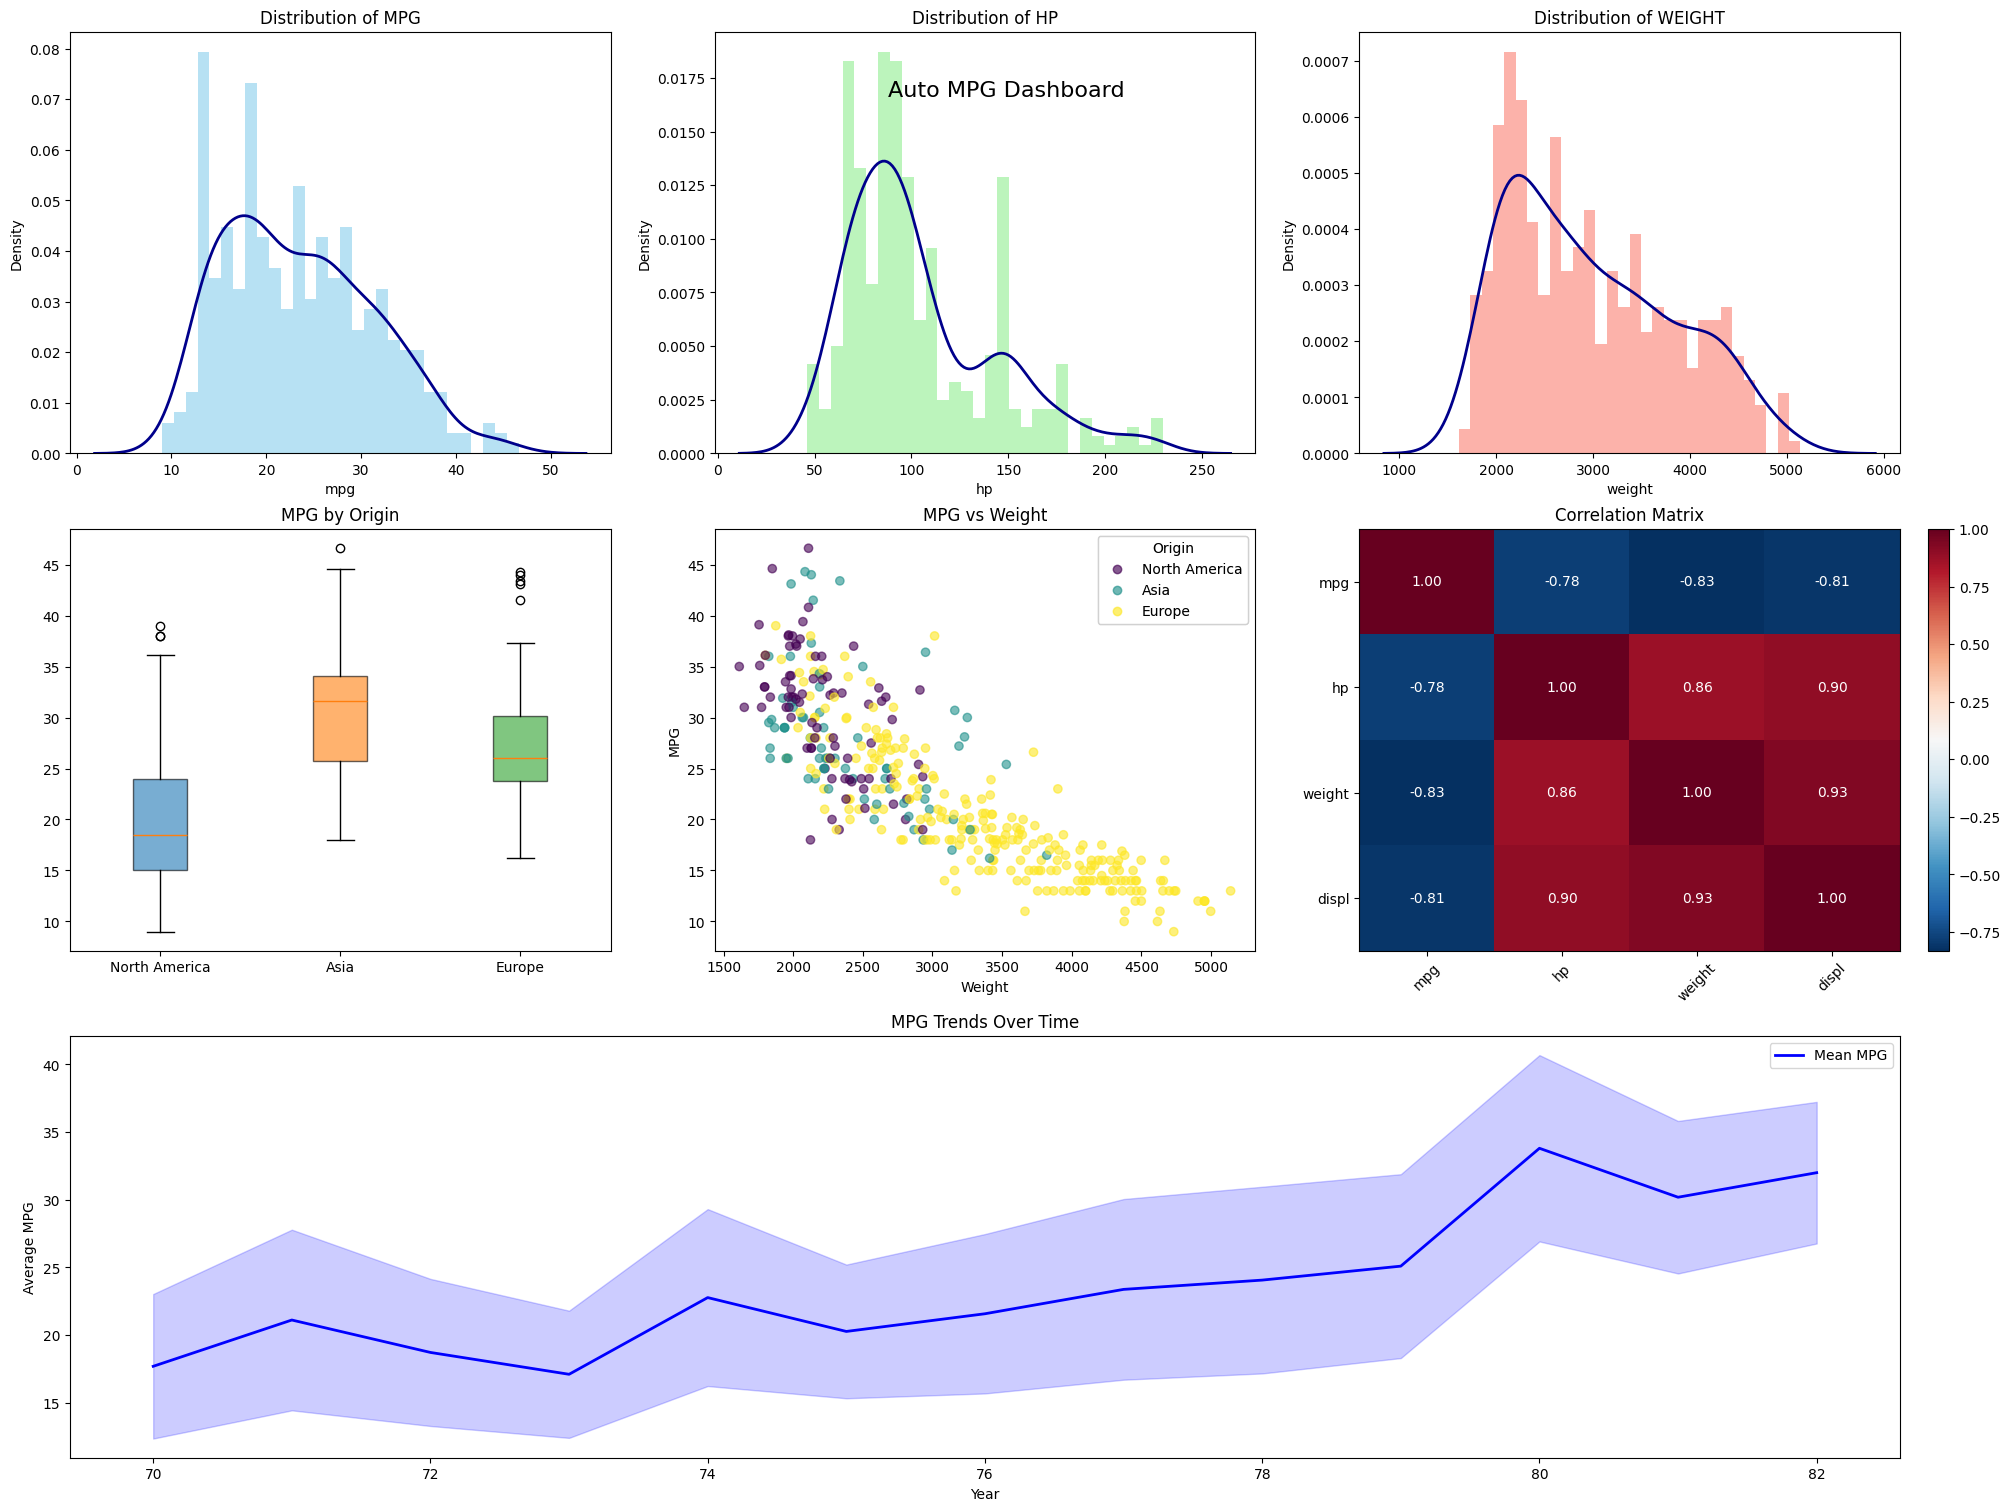

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.sampledata.autompg import autompg_clean as df

# Set the style for better-looking plots
plt.rcParams['figure.dpi'] = 100

def create_dashboard(df, figsize=(20, 15)):
    """Create a complete dashboard with all visualizations."""
    # Create main figure and grid
    fig = plt.figure(figsize=figsize, constrained_layout=True)

    # Create a complex grid layout
    gs = fig.add_gridspec(3, 3)

    # 1. Histograms - Top Row
    ax1 = fig.add_subplot(gs[0, 0])  # MPG Distribution
    ax2 = fig.add_subplot(gs[0, 1])  # HP Distribution
    ax3 = fig.add_subplot(gs[0, 2])  # Weight Distribution

    # Create histograms with KDE
    for ax, var, color in zip([ax1, ax2, ax3],
                             ['mpg', 'hp', 'weight'],
                             ['skyblue', 'lightgreen', 'salmon']):
        ax.hist(df[var], bins=30, alpha=0.6, density=True, color=color)
        sns.kdeplot(data=df[var], ax=ax, color='darkblue', linewidth=2)
        ax.set_title(f'Distribution of {var.upper()}')
        ax.set_xlabel(var)

    # 2. Box Plots - Middle Left
    ax4 = fig.add_subplot(gs[1, 0])
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    bp = ax4.boxplot([df[df['origin']==origin]['mpg'] for origin in df['origin'].unique()],
                     patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    ax4.set_title('MPG by Origin')
    ax4.set_xticklabels(df['origin'].unique())

    # 3. Scatter Plot - Middle Center
    ax5 = fig.add_subplot(gs[1, 1])
    scatter = ax5.scatter(df['weight'], df['mpg'],
                         c=pd.Categorical(df['origin']).codes,
                         cmap='viridis', alpha=0.6)
    ax5.set_title('MPG vs Weight')
    ax5.set_xlabel('Weight')
    ax5.set_ylabel('MPG')
    legend1 = ax5.legend(scatter.legend_elements()[0],
                        df['origin'].unique(),
                        title="Origin",
                        loc="upper right")
    ax5.add_artist(legend1)

    # 4. Correlation Heatmap - Middle Right
    ax6 = fig.add_subplot(gs[1, 2])
    numeric_cols = ['mpg', 'hp', 'weight', 'displ']
    corr_matrix = df[numeric_cols].corr()
    im = ax6.imshow(corr_matrix, cmap='RdBu_r', aspect='auto')
    plt.colorbar(im, ax=ax6)
    ax6.set_xticks(range(len(numeric_cols)))
    ax6.set_yticks(range(len(numeric_cols)))
    ax6.set_xticklabels(numeric_cols, rotation=45)
    ax6.set_yticklabels(numeric_cols)
    ax6.set_title('Correlation Matrix')

    # Add correlation values
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            text = ax6.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center',
                          color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

    # 5. Time Series - Bottom Row
    ax7 = fig.add_subplot(gs[2, :])
    yearly_stats = df.groupby('yr').agg({
        'mpg': ['mean', 'std']
    }).reset_index()
    ax7.plot(yearly_stats['yr'], yearly_stats['mpg']['mean'],
             color='blue', linewidth=2, label='Mean MPG')
    ax7.fill_between(yearly_stats['yr'],
                     yearly_stats['mpg']['mean'] - yearly_stats['mpg']['std'],
                     yearly_stats['mpg']['mean'] + yearly_stats['mpg']['std'],
                     alpha=0.2, color='blue')
    ax7.set_title('MPG Trends Over Time')
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Average MPG')
    ax7.legend()

    # Add an overall title
    fig.suptitle('Auto MPG Dashboard', fontsize=16, y=0.95)

    return fig

# Create and display the dashboard
dashboard = create_dashboard(df)
plt.show()

# Optionally save the dashboard
# dashboard.savefig('auto_mpg_dashboard.png', dpi=300, bbox_inches='tight')


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import seaborn as sns
from bokeh.sampledata.autompg import autompg_clean as df
from IPython.display import clear_output

# Set the style for better-looking plots
plt.rcParams['figure.dpi'] = 100

def create_dashboard(df, selected_origin='All'):
    """Create dashboard with current origin selection"""
    # Filter data based on selection
    if selected_origin == 'All':
        filtered_df = df
    else:
        filtered_df = df[df['origin'] == selected_origin]

    # Create main figure and grid
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(3, 3)

    # 1. Histograms - Top Row
    for idx, (var, color) in enumerate(zip(['mpg', 'hp', 'weight'],
                                         ['skyblue', 'lightgreen', 'salmon'])):
        ax = fig.add_subplot(gs[0, idx])
        ax.hist(filtered_df[var], bins=30, alpha=0.6, density=True, color=color)
        sns.kdeplot(data=filtered_df[var], ax=ax, color='darkblue', linewidth=2)
        ax.set_title(f'Distribution of {var.upper()}')
        ax.set_xlabel(var)

    # 2. Box Plots - Middle Left
    ax4 = fig.add_subplot(gs[1, 0])
    if selected_origin == 'All':
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        bp = ax4.boxplot([df[df['origin']==origin]['mpg']
                         for origin in df['origin'].unique()],
                         patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        ax4.set_xticklabels(df['origin'].unique())
    else:
        bp = ax4.boxplot([filtered_df['mpg']], patch_artist=True)
        bp['boxes'][0].set_facecolor('#1f77b4')
        bp['boxes'][0].set_alpha(0.6)
        ax4.set_xticklabels([selected_origin])
    ax4.set_title('MPG by Origin')

    # 3. Scatter Plot - Middle Center
    ax5 = fig.add_subplot(gs[1, 1])
    if selected_origin == 'All':
        scatter = ax5.scatter(filtered_df['weight'], filtered_df['mpg'],
                            c=pd.Categorical(filtered_df['origin']).codes,
                            cmap='viridis', alpha=0.6)
        legend1 = ax5.legend(scatter.legend_elements()[0],
                           filtered_df['origin'].unique(),
                           title="Origin",
                           loc="upper right")
        ax5.add_artist(legend1)
    else:
        ax5.scatter(filtered_df['weight'], filtered_df['mpg'],
                   color='blue', alpha=0.6)
    ax5.set_title('MPG vs Weight')
    ax5.set_xlabel('Weight')
    ax5.set_ylabel('MPG')

    # 4. Correlation Heatmap - Middle Right
    ax6 = fig.add_subplot(gs[1, 2])
    numeric_cols = ['mpg', 'hp', 'weight', 'displ']
    corr_matrix = filtered_df[numeric_cols].corr()
    im = ax6.imshow(corr_matrix, cmap='RdBu_r', aspect='auto')
    plt.colorbar(im, ax=ax6)
    ax6.set_xticks(range(len(numeric_cols)))
    ax6.set_yticks(range(len(numeric_cols)))
    ax6.set_xticklabels(numeric_cols, rotation=45)
    ax6.set_yticklabels(numeric_cols)
    ax6.set_title('Correlation Matrix')

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            text = ax6.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center',
                          color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

    # 5. Time Series - Bottom Row
    ax7 = fig.add_subplot(gs[2, :])
    yearly_stats = filtered_df.groupby('yr').agg({
        'mpg': ['mean', 'std']
    }).reset_index()
    ax7.plot(yearly_stats['yr'], yearly_stats['mpg']['mean'],
            color='blue', linewidth=2, label='Mean MPG')
    ax7.fill_between(yearly_stats['yr'],
                    yearly_stats['mpg']['mean'] - yearly_stats['mpg']['std'],
                    yearly_stats['mpg']['mean'] + yearly_stats['mpg']['std'],
                    alpha=0.2, color='blue')
    ax7.set_title('MPG Trends Over Time')
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Average MPG')
    ax7.legend()

    # Add an overall title
    title = f'Auto MPG Dashboard - {selected_origin} Origins' if selected_origin != 'All' else 'Auto MPG Dashboard - All Origins'
    fig.suptitle(title, fontsize=16, y=0.95)

    plt.tight_layout()
    return fig

# Create interactive selection using IPython widgets
from ipywidgets import interact, Dropdown

@interact(origin=Dropdown(
    options=['All'] + list(df['origin'].unique()),
    value='All',
    description='Origin:',
    style={'description_width': 'initial'}
))
def update_dashboard(origin):
    clear_output(wait=True)
    fig = create_dashboard(df, origin)
    plt.show()


interactive(children=(Dropdown(description='Origin:', options=('All', 'North America', 'Asia', 'Europe'), styl…

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.sampledata.autompg import autompg_clean as df
from IPython.display import clear_output
from ipywidgets import interact, Dropdown, IntRangeSlider, HBox, VBox

# Set the style for better-looking plots
plt.rcParams['figure.dpi'] = 100

def create_dashboard(df, selected_origin='All', year_range=(70, 82)):
    """Create dashboard with current origin and year range selection"""
    # Filter data based on selections
    mask = (df['yr'] >= year_range[0]) & (df['yr'] <= year_range[1])
    if selected_origin == 'All':
        filtered_df = df[mask]
    else:
        filtered_df = df[mask & (df['origin'] == selected_origin)]

    # Create main figure and grid
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(3, 3)

    # 1. Histograms - Top Row
    for idx, (var, color) in enumerate(zip(['mpg', 'hp', 'weight'],
                                         ['skyblue', 'lightgreen', 'salmon'])):
        ax = fig.add_subplot(gs[0, idx])
        ax.hist(filtered_df[var], bins=30, alpha=0.6, density=True, color=color)
        sns.kdeplot(data=filtered_df[var], ax=ax, color='darkblue', linewidth=2)
        ax.set_title(f'Distribution of {var.upper()}\n(Years: {year_range[0]}-{year_range[1]})')
        ax.set_xlabel(var)

    # 2. Box Plots - Middle Left
    ax4 = fig.add_subplot(gs[1, 0])
    if selected_origin == 'All':
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        origins = df['origin'].unique()
        bp = ax4.boxplot([filtered_df[filtered_df['origin']==origin]['mpg']
                         for origin in origins],
                         patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        ax4.set_xticklabels(origins)
    else:
        bp = ax4.boxplot([filtered_df['mpg']], patch_artist=True)
        bp['boxes'][0].set_facecolor('#1f77b4')
        bp['boxes'][0].set_alpha(0.6)
        ax4.set_xticklabels([selected_origin])
    ax4.set_title(f'MPG by Origin\n(Years: {year_range[0]}-{year_range[1]})')

    # 3. Scatter Plot - Middle Center
    ax5 = fig.add_subplot(gs[1, 1])
    if selected_origin == 'All':
        scatter = ax5.scatter(filtered_df['weight'], filtered_df['mpg'],
                            c=pd.Categorical(filtered_df['origin']).codes,
                            cmap='viridis', alpha=0.6)
        legend1 = ax5.legend(scatter.legend_elements()[0],
                           filtered_df['origin'].unique(),
                           title="Origin",
                           loc="upper right")
        ax5.add_artist(legend1)
    else:
        ax5.scatter(filtered_df['weight'], filtered_df['mpg'],
                   color='blue', alpha=0.6)
    ax5.set_title(f'MPG vs Weight\n(Years: {year_range[0]}-{year_range[1]})')
    ax5.set_xlabel('Weight')
    ax5.set_ylabel('MPG')

    # 4. Correlation Heatmap - Middle Right
    ax6 = fig.add_subplot(gs[1, 2])
    numeric_cols = ['mpg', 'hp', 'weight', 'displ']
    corr_matrix = filtered_df[numeric_cols].corr()
    im = ax6.imshow(corr_matrix, cmap='RdBu_r', aspect='auto')
    plt.colorbar(im, ax=ax6)
    ax6.set_xticks(range(len(numeric_cols)))
    ax6.set_yticks(range(len(numeric_cols)))
    ax6.set_xticklabels(numeric_cols, rotation=45)
    ax6.set_yticklabels(numeric_cols)
    ax6.set_title(f'Correlation Matrix\n(Years: {year_range[0]}-{year_range[1]})')

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            text = ax6.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center',
                          color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

    # 5. Time Series - Bottom Row
    ax7 = fig.add_subplot(gs[2, :])
    yearly_stats = filtered_df.groupby('yr').agg({
        'mpg': ['mean', 'std']
    }).reset_index()
    ax7.plot(yearly_stats['yr'], yearly_stats['mpg']['mean'],
            color='blue', linewidth=2, label='Mean MPG')
    ax7.fill_between(yearly_stats['yr'],
                    yearly_stats['mpg']['mean'] - yearly_stats['mpg']['std'],
                    yearly_stats['mpg']['mean'] + yearly_stats['mpg']['std'],
                    alpha=0.2, color='blue')
    ax7.set_title('MPG Trends Over Time')
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Average MPG')
    # Highlight selected range
    ax7.axvspan(year_range[0], year_range[1], color='yellow', alpha=0.1)
    ax7.legend()

    # Add an overall title
    title = f'Auto MPG Dashboard - {selected_origin} Origins\nYears: {year_range[0]}-{year_range[1]}'
    if selected_origin == 'All':
        title = f'Auto MPG Dashboard - All Origins\nYears: {year_range[0]}-{year_range[1]}'
    fig.suptitle(title, fontsize=16, y=0.95)

    plt.tight_layout()
    return fig

# Create interactive controls
def interactive_dashboard():
    # Create widgets
    origin_dropdown = Dropdown(
        options=['All'] + list(df['origin'].unique()),
        value='All',
        description='Origin:',
        style={'description_width': 'initial'}
    )

    year_slider = IntRangeSlider(
        value=[70, 82],
        min=70,
        max=82,
        step=1,
        description='Year Range:',
        continuous_update=False,
        style={'description_width': 'initial'},
        layout={'width': '400px'}
    )

    # Update function
    def update(origin, year_range):
        clear_output(wait=True)
        fig = create_dashboard(df, origin, year_range)
        plt.show()

    # Connect widgets to update function
    interact(update, origin=origin_dropdown, year_range=year_slider)

# Display the interactive dashboard
interactive_dashboard()


interactive(children=(Dropdown(description='Origin:', options=('All', 'North America', 'Asia', 'Europe'), styl…

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.sampledata.autompg import autompg_clean as df
from IPython.display import clear_output
from ipywidgets import interact, Dropdown, IntRangeSlider, RadioButtons, HBox, VBox, Layout

# Set the style for better-looking plots
plt.rcParams['figure.dpi'] = 100

def create_dashboard(df, selected_origin='All', year_range=(70, 82), selected_cyl='All'):
    """Create dashboard with current origin, year range, and cylinder selection"""
    # Filter data based on selections
    mask = (df['yr'] >= year_range[0]) & (df['yr'] <= year_range[1])

    if selected_origin != 'All':
        mask = mask & (df['origin'] == selected_origin)

    if selected_cyl != 'All':
        mask = mask & (df['cyl'] == int(selected_cyl))

    filtered_df = df[mask]

    # Create main figure and grid
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(3, 3)

    # Add filter information for titles
    filter_info = f"Years: {year_range[0]}-{year_range[1]}"
    filter_info += f"\nCylinders: {selected_cyl}"

    # 1. Histograms - Top Row
    for idx, (var, color) in enumerate(zip(['mpg', 'hp', 'weight'],
                                         ['skyblue', 'lightgreen', 'salmon'])):
        ax = fig.add_subplot(gs[0, idx])
        ax.hist(filtered_df[var], bins=30, alpha=0.6, density=True, color=color)
        sns.kdeplot(data=filtered_df[var], ax=ax, color='darkblue', linewidth=2)
        ax.set_title(f'Distribution of {var.upper()}\n{filter_info}')
        ax.set_xlabel(var)

    # 2. Box Plots - Middle Left
    ax4 = fig.add_subplot(gs[1, 0])
    if selected_origin == 'All':
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        origins = df['origin'].unique()
        bp = ax4.boxplot([filtered_df[filtered_df['origin']==origin]['mpg']
                         for origin in origins],
                         patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        ax4.set_xticklabels(origins)
    else:
        bp = ax4.boxplot([filtered_df['mpg']], patch_artist=True)
        bp['boxes'][0].set_facecolor('#1f77b4')
        bp['boxes'][0].set_alpha(0.6)
        ax4.set_xticklabels([selected_origin])
    ax4.set_title(f'MPG by Origin\n{filter_info}')

    # 3. Scatter Plot - Middle Center
    ax5 = fig.add_subplot(gs[1, 1])
    if selected_origin == 'All':
        scatter = ax5.scatter(filtered_df['weight'], filtered_df['mpg'],
                            c=pd.Categorical(filtered_df['origin']).codes,
                            cmap='viridis', alpha=0.6)
        legend1 = ax5.legend(scatter.legend_elements()[0],
                           filtered_df['origin'].unique(),
                           title="Origin",
                           loc="upper right")
        ax5.add_artist(legend1)
    else:
        ax5.scatter(filtered_df['weight'], filtered_df['mpg'],
                   color='blue', alpha=0.6)
    ax5.set_title(f'MPG vs Weight\n{filter_info}')
    ax5.set_xlabel('Weight')
    ax5.set_ylabel('MPG')

    # 4. Correlation Heatmap - Middle Right
    ax6 = fig.add_subplot(gs[1, 2])
    numeric_cols = ['mpg', 'hp', 'weight', 'displ']
    corr_matrix = filtered_df[numeric_cols].corr()
    im = ax6.imshow(corr_matrix, cmap='RdBu_r', aspect='auto')
    plt.colorbar(im, ax=ax6)
    ax6.set_xticks(range(len(numeric_cols)))
    ax6.set_yticks(range(len(numeric_cols)))
    ax6.set_xticklabels(numeric_cols, rotation=45)
    ax6.set_yticklabels(numeric_cols)
    ax6.set_title(f'Correlation Matrix\n{filter_info}')

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            text = ax6.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha='center', va='center',
                          color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

    # 5. Time Series - Bottom Row
    ax7 = fig.add_subplot(gs[2, :])
    yearly_stats = filtered_df.groupby('yr').agg({
        'mpg': ['mean', 'std']
    }).reset_index()
    ax7.plot(yearly_stats['yr'], yearly_stats['mpg']['mean'],
            color='blue', linewidth=2, label='Mean MPG')
    if len(yearly_stats) > 1:  # Only add std deviation if we have enough data points
        ax7.fill_between(yearly_stats['yr'],
                        yearly_stats['mpg']['mean'] - yearly_stats['mpg']['std'],
                        yearly_stats['mpg']['mean'] + yearly_stats['mpg']['std'],
                        alpha=0.2, color='blue')
    ax7.set_title('MPG Trends Over Time')
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Average MPG')
    ax7.axvspan(year_range[0], year_range[1], color='yellow', alpha=0.1)
    ax7.legend()

    # Add sample size information
    sample_text = f"Sample size: {len(filtered_df)} vehicles"
    fig.text(0.02, 0.02, sample_text, fontsize=10, style='italic')

    # Add an overall title
    title = f'Auto MPG Dashboard - {selected_origin} Origins'
    if selected_origin == 'All':
        title = 'Auto MPG Dashboard - All Origins'
    fig.suptitle(title, fontsize=16, y=0.95)

    plt.tight_layout()
    return fig

# Create interactive controls
def interactive_dashboard():
    # Create widgets with specific layouts
    origin_dropdown = Dropdown(
        options=['All'] + list(df['origin'].unique()),
        value='All',
        description='Origin:',
        style={'description_width': 'initial'},
        layout=Layout(width='200px')
    )

    year_slider = IntRangeSlider(
        value=[70, 82],
        min=70,
        max=82,
        step=1,
        description='Year Range:',
        continuous_update=False,
        style={'description_width': 'initial'},
        layout=Layout(width='400px')
    )

    cylinder_radio = RadioButtons(
        options=['All'] + [str(cyl) for cyl in sorted(df['cyl'].unique())],
        value='All',
        description='Cylinders:',
        style={'description_width': 'initial'},
        layout=Layout(width='200px')
    )

    # Update function
    def update(origin, year_range, cyl):
        clear_output(wait=True)
        fig = create_dashboard(df, origin, year_range, cyl)
        plt.show()

    # Create a container for controls with better layout
    controls = VBox([
        HBox([origin_dropdown, cylinder_radio],
             layout=Layout(justify_content='space-around')),
        year_slider
    ])

    # Display controls and connect to update function
    interact(update, origin=origin_dropdown, year_range=year_slider, cyl=cylinder_radio)

# Display the interactive dashboard
interactive_dashboard()

interactive(children=(Dropdown(description='Origin:', layout=Layout(width='200px'), options=('All', 'North Ame…